In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from imgaug import augmenters as iaa

c:\Users\kanna\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## FEATURE EXTRACTION AND DATA PRE-PROCESSING

In [227]:
data_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train_final" 

In [260]:
feature_vectors = []
labels = []

In [261]:
# Set parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [262]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),  
    iaa.Affine(rotate=(-10, 10)),  
    iaa.GaussianBlur(sigma=(0, 1.0)),  
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)), 
])

In [263]:
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        
        image = cv2.imread(image_path)
        
        image = augmentation.augment_image(image)
        
        image = cv2.resize(image, (128, 128))
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
        
        feature_vectors.append(features)
        labels.append(class_label)

In [264]:
feature_vectors

[array([0.2306182 , 0.13346892, 0.22842676, ..., 0.2008946 , 0.08372439,
        0.0774525 ]),
 array([0.30268497, 0.03407904, 0.10203084, ..., 0.13499041, 0.09386709,
        0.0188746 ]),
 array([0.24507741, 0.16712842, 0.09481246, ..., 0.21598185, 0.13302201,
        0.05906967]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.26896884, 0.06819541, 0.06751796, ..., 0.12907258, 0.22681382,
        0.12307657]),
 array([0.12067994, 0.06029988, 0.02615877, ..., 0.10159426, 0.10573402,
        0.1693393 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.14337981, 0.03607985, 0.14257316, ..., 0.19394747, 0.173526  ,
        0.15666971]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.15013769, 0.18806132, 0.09449181, ..., 0.09926599, 0.10428593,
        0.05731488]),
 array([0.53333671, 0.02430443, 0.00851027, ..., 0.1360495 , 0.13725736,
        0.09420267]),
 array([0.16412188, 0.08704129, 0.08575131, ..., 0.06727034, 0.053802  ,
        0.09400519]),
 array([0.27051795, 0.081765

In [265]:
labels

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [266]:
# Convert the feature vectors and labels to NumPy arrays
X = np.array(feature_vectors)

In [267]:
y = np.array(labels)

In [268]:
print(X)

[[0.2306182  0.13346892 0.22842676 ... 0.2008946  0.08372439 0.0774525 ]
 [0.30268497 0.03407904 0.10203084 ... 0.13499041 0.09386709 0.0188746 ]
 [0.24507741 0.16712842 0.09481246 ... 0.21598185 0.13302201 0.05906967]
 ...
 [0.22472384 0.17387665 0.06076164 ... 0.19280963 0.22150087 0.08089366]
 [0.13373838 0.23024784 0.04265059 ... 0.18660502 0.13951595 0.        ]
 [0.22160249 0.14613205 0.12106675 ... 0.07971506 0.12589608 0.18472035]]


In [269]:
X.shape,y.shape

((7500, 8100), (7500,))

In [270]:
# Encode class labels (convert class names to integers)
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
y_enc

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

## 

In [271]:
df = pd.DataFrame(y,y_enc)
df

,0
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
...,...
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [272]:
y_enc.shape

(7500,)

In [16]:
df.drop_duplicates(inplace=True)
df

,0
0,Apple___Black_rot
1,Blueberry___healthy
2,Cherry_(including_sour)___Powdery_mildew
3,Corn_(maize)___Common_rust_
4,Grape___Black_rot
5,Orange___Haunglongbing_(Citrus_greening)
6,Peach___Bacterial_spot
7,"Pepper,_bell___Bacterial_spot"
8,Potato___Early_blight
9,Raspberry___healthy


## MODEL TRAINING 

In [69]:
randomforest_model = RandomForestClassifier(
    n_estimators=100, 
    criterion='gini',  
    max_depth=10,  
)


In [70]:
randomforest_model.fit(X, y_enc)

RandomForestClassifier(max_depth=10)

# VALIDATING THE MODEL

In [296]:
data_valid_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid"

In [190]:
feature_vectors_valid = []
labels_valid = []

In [191]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [192]:
for class_label in os.listdir(data_valid_dir):
    class_dir = os.path.join(data_valid_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        
        image = cv2.imread(image_path)
        
        image = cv2.resize(image, (128, 128))
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
        
        feature_vectors_valid.append(features)
        labels_valid.append(class_label)

In [193]:
feature_vectors_valid

[array([0.21328912, 0.        , 0.16700493, ..., 0.07994909, 0.22296044,
        0.14305417]),
 array([0.15237508, 0.07036889, 0.14665507, ..., 0.21957034, 0.12652922,
        0.13956495]),
 array([0.18057921, 0.00663334, 0.04575824, ..., 0.13672808, 0.13693613,
        0.10316129]),
 array([0.14837934, 0.06614929, 0.07827395, ..., 0.23985809, 0.09318912,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.21607873, 0.13672199, 0.04116568, ..., 0.15775564, 0.13203765,
        0.04620745]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.2919783 , 0.04812105, 0.07872579, ..., 0.0538613 , 0.17429683,
        0.06966076]),
 array([0.22895477, 0.14064216, 0.1700406 , ..., 0.16830015, 0.17651345,
        0.09511412]),
 array([0.23984255, 0.07865992, 0.12987424, ..., 0.13177663, 0.17392774,
        0.08521013]),
 array([0.15702468, 0.24735834, 0.0691484 , ..., 0.23629224, 0.22758263,
        0.12082506]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.23606311, 0.026144

In [194]:
labels_valid

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [195]:
X_valid = np.array(feature_vectors_valid)
y_valid = np.array(labels_valid)

In [196]:
X_valid.shape,y_valid.shape

((1500, 8100), (1500,))

## LABEL ENCODING (PRE-PROCESSING)

In [77]:
label_encoder = LabelEncoder()
y_valid = label_encoder.fit_transform(y_valid)

In [78]:
y_valid_pred = randomforest_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
class_report_valid = classification_report(y_valid, y_valid_pred)

c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
acuracy_valid

0.712

## VISUALISATION METRICS FOR VALIDATION

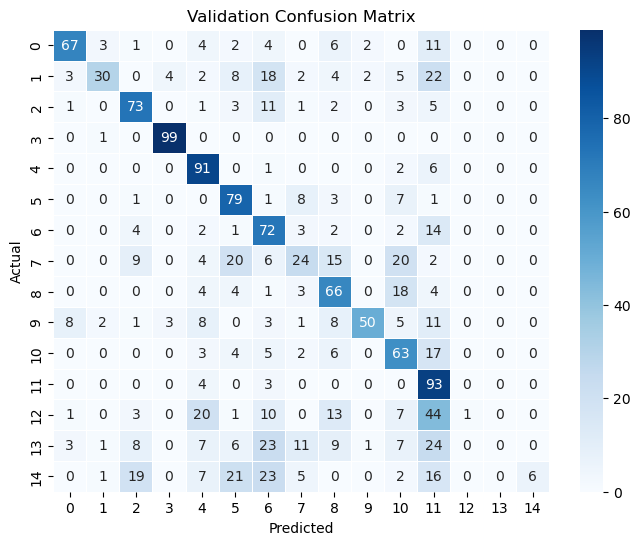

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [81]:
import pandas as pd
from sklearn.metrics import classification_report

class_report_dict = classification_report(y_valid, y_valid_pred, output_dict=True)

classification_report_df = pd.DataFrame(class_report_dict)

print('Validation Classification Report:')
classification_report_df


Validation Classification Report:


c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,accuracy,macro avg,weighted avg
precision,0.807229,0.789474,0.613445,0.933962,0.579618,0.530201,0.397790,0.40,0.492537,0.909091,0.446809,0.344444,1.000000,0.0,1.000000,0.542667,0.616307,0.616307
recall,0.670000,0.300000,0.730000,0.990000,0.910000,0.790000,0.720000,0.24,0.660000,0.500000,0.630000,0.930000,0.010000,0.0,0.060000,0.542667,0.542667,0.542667
f1-score,0.732240,0.434783,0.666667,0.961165,0.708171,0.634538,0.512456,0.30,0.564103,0.645161,0.522822,0.502703,0.019802,0.0,0.113208,0.542667,0.487854,0.487854
support,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,0.542667,1500.000000,1500.000000


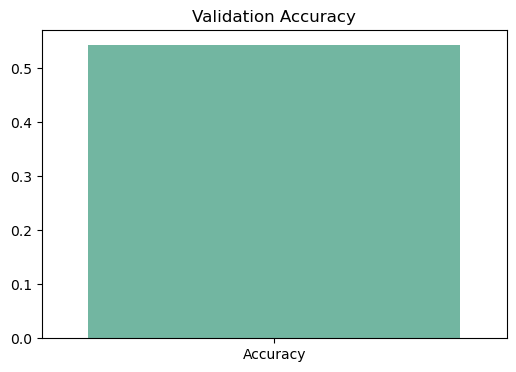

In [82]:
# Create a Seaborn barplot for accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy_valid], palette='Set2')
plt.title('Validation Accuracy')
plt.show()

## MODEL TESTING

In [199]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [200]:
feature_test=[]
label_test=[]

In [201]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [202]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (128, 128))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
    
    feature_test.append(features)
    label_test.append(image_file)

In [203]:
feature_test

[array([0.3878978 , 0.04213401, 0.02896267, ..., 0.09204177, 0.08195669,
        0.08477164]),
 array([0.17569234, 0.06930438, 0.14314371, ..., 0.        , 0.21528088,
        0.0906029 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.38116011, 0.        , 0.        , ..., 0.2942634 , 0.2942634 ,
        0.2942634 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.34665116, 0.2475154 , 0.        , ..., 0.06811334, 0.09349503,
        0.14697103]),
 array([0.21679891, 0.05887299, 0.12048961, ..., 0.10753159, 0.04857285,
        0.        ]),
 array([0.20518527, 0.15536076, 0.13425269, ..., 0.12229223, 0.13323229,
        0.11584329]),
 array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
        0.2215013 ]),
 array([0.23211236, 0.10355923, 0.2093943 , ..., 0.0656748 , 0.10546845,
        0.17560894]),
 array([0.20376697, 0.11517297, 0.1362592 , ..., 0.12960245, 0.07519557,
        0.0

In [204]:
label_test

['Apple_Black_rot (1).JPG',
 'Apple_Black_rot (2).JPG',
 'Apple_Black_rot (3).JPG',
 'Apple___Black_rot.JPG',
 'Corn_(maize)___Common_rust_ (1).JPG',
 'Corn_(maize)___Common_rust_ (2).JPG',
 'Corn_(maize)___Common_rust_ (3).JPG',
 'Corn_(maize)___Common_rust_.JPG',
 'Grape_Black_rot (1).JPG',
 'Grape_Black_rot (2).JPG',
 'Grape_Black_rot (3).JPG',
 'Grape___Black_rot.JPG',
 'Orange_Haunglingbing (1).JPG',
 'Orange_Haunglingbing (2).JPG',
 'Orange_Haunglingbing (3).JPG',
 'Orange___Haunglongbing_(Citrus_greening).JPG',
 'Peach_Bacterial_spot (1).JPG',
 'Peach_Bacterial_spot (2).JPG',
 'Peach_Bacterial_spot (3).JPG',
 'Peach___Bacterial_spot.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight4.JPG',
 'Potato___Early_blight.JPG',
 'Squash___Powdery_mildew.JPG',
 'Strawberry_lear_scorch (1).JPG',
 'Strawberry_lear_scorch (2).JPG',
 'Strawberry___Leaf_scorch.JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (4).JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (5).JPG'

In [205]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [206]:
x_test.shape

(32, 8100)

In [89]:
y_test_pred = randomforest_model.predict(x_test)

In [90]:
y_test.shape

(32,)

In [91]:
y_test_pred.shape

(32,)

In [92]:
y_test

array([ 0,  0,  0,  0,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,
        6,  6,  6,  8,  8,  8,  8, 11, 12, 12, 12, 14, 14, 14, 14])

In [93]:
y_test_pred

array([ 0,  0,  0,  0,  3,  3,  3,  3,  4,  4,  4,  4,  7,  5,  5,  5,  6,
       11,  6,  6, 10,  8,  8,  8, 11, 12, 11, 11,  4,  2,  5,  2],
      dtype=int64)

### ACCURACY BEFORE HYPERPARAMETER TUNING

In [94]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [95]:
accuracy_test

0.71875

## GRID SEARCH (HYPER PARAMETER TUNING)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, 30, 40],  
}

grid_search = GridSearchCV(
    estimator=randomforest_model, 
    param_grid=param_grid,
    cv=5, 
    n_jobs=-1,  # Using all available CPU cores
    scoring='accuracy',
    verbose=2  
)


grid_search.fit(X, y_enc)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best Hyperparameters:", best_params)

best_model.fit(X, y_enc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Hyperparameters: {'max_depth': 40, 'n_estimators': 200}


RandomForestClassifier(max_depth=40, n_estimators=200)

## RESULTS OF EACH FIT

In [46]:
import pandas as pd

results = grid_search.cv_results_

results_df = pd.DataFrame(results)

results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,72.955645,2.419363,0.190839,0.025133,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.770102,0.774488,0.765716,0.758041,0.760512,0.765772,0.006036,12
1,143.853744,1.520756,0.321870,0.038950,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.773757,0.788743,0.779605,0.771930,0.779159,0.778639,0.005867,11
2,281.374634,3.188967,0.699438,0.061375,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.788377,0.794225,0.782895,0.779971,0.790128,0.787119,0.005101,10
3,99.255198,5.112702,0.208640,0.032810,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.942251,0.942617,0.927266,0.903509,0.910055,0.925140,0.016114,8
4,197.038364,3.946150,0.349074,0.065615,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.941155,0.944079,0.931652,0.908991,0.907130,0.926601,0.015697,6
5,373.298753,2.364403,0.771957,0.181321,20,200,"{'max_depth': 20, 'n_estimators': 200}",0.942982,0.943713,0.932749,0.912646,0.915539,0.929526,0.013216,3
6,105.877386,3.733039,0.192437,0.015498,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.943713,0.944079,0.929825,0.906067,0.908958,0.926528,0.016380,7
7,192.988320,5.946232,0.310558,0.032834,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.942251,0.943348,0.927997,0.913012,0.912980,0.927918,0.013333,4
8,410.274237,5.552455,0.391473,0.021589,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.942617,0.946637,0.932749,0.908626,0.918464,0.929819,0.014376,2
9,99.976926,2.598722,0.277558,0.067037,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.940058,0.939693,0.925073,0.902047,0.907130,0.922800,0.015904,9


# TUNED MODEL TRANING 

In [288]:
randomforest_model_tuned = RandomForestClassifier(
    n_estimators=200,  
    criterion='gini', 
    max_depth=40, 
)

In [290]:
randomforest_model_tuned.fit(X, y_enc)

RandomForestClassifier(max_depth=40, n_estimators=200)

In [310]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [311]:
feature_test=[]
label_test=[]

In [312]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)

    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (128, 128))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

    feature_test.append(features)
    label_test.append(image_file)

In [313]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [314]:
y_test_pred = randomforest_model_tuned.predict(x_test)

In [321]:
y_test.shape,y_test_pred.shape

((32,), (32,))

## ACCURACY IMPROVEMENT AFTER TUNING

In [315]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [316]:
accuracy_test

0.875

## PERFORMANCE METRICS

In [317]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test,y_test_pred)
conf_matrix = confusion_matrix(y_test,y_test_pred)
class_report = classification_report(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
f1 = f1_score(y_test,y_test_pred, average='weighted')


c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

In [318]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_df

,Metric,Value
0,Accuracy,0.875000
1,Precision,0.933333
2,Recall,0.875000
3,F1-Score,0.895933


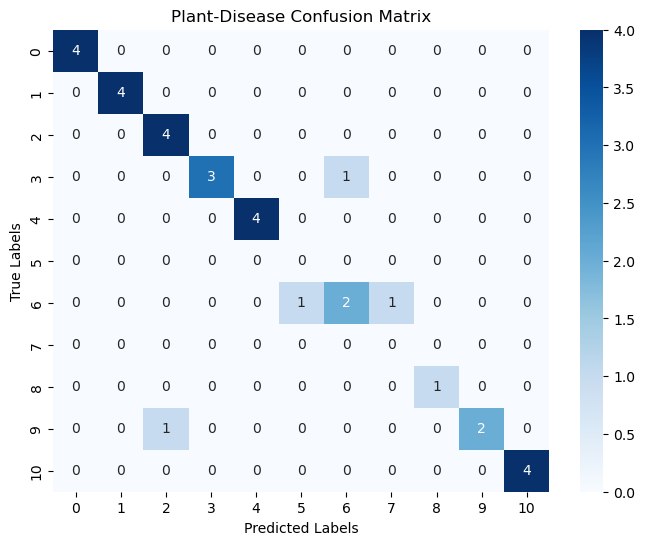

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Plant-Disease Confusion Matrix')

plt.show()


# SAVING THE TUNED MODEL

In [56]:
from joblib import dump

dump(randomforest_model_tuned, 'RANDOMFOREST_PLANT_DISEASE.joblib')

['RANDOMFOREST_PLANT_DISEASE.joblib']

## IMAGE TRANSFORMATION

In [57]:
test_image_path = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final\\Grape_Black_rot (3).JPG"

In [58]:
image = cv2.imread(test_image_path)

In [59]:
image

array([[[158, 159, 163],
        [169, 170, 174],
        [134, 135, 139],
        ...,
        [133, 134, 144],
        [143, 144, 154],
        [126, 127, 137]],

       [[166, 167, 171],
        [185, 186, 190],
        [147, 148, 152],
        ...,
        [123, 124, 134],
        [ 81,  82,  92],
        [112, 113, 123]],

       [[128, 129, 133],
        [140, 141, 145],
        [142, 143, 147],
        ...,
        [125, 126, 136],
        [152, 153, 163],
        [173, 174, 184]],

       ...,

       [[178, 177, 179],
        [175, 174, 176],
        [174, 173, 175],
        ...,
        [153, 153, 159],
        [159, 159, 165],
        [163, 163, 169]],

       [[171, 170, 172],
        [176, 175, 177],
        [178, 177, 179],
        ...,
        [151, 151, 157],
        [161, 161, 167],
        [173, 173, 179]],

       [[163, 162, 164],
        [174, 173, 175],
        [179, 178, 180],
        ...,
        [143, 143, 149],
        [151, 151, 157],
        [166, 166, 172]]

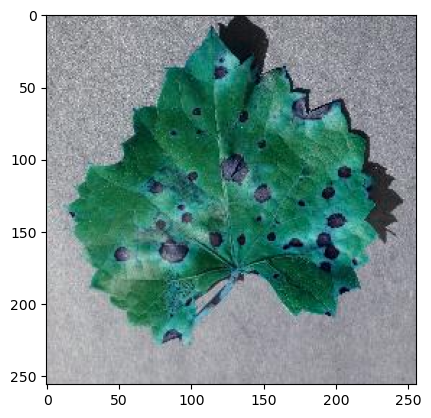

In [60]:
plt.imshow(image)
plt.show()

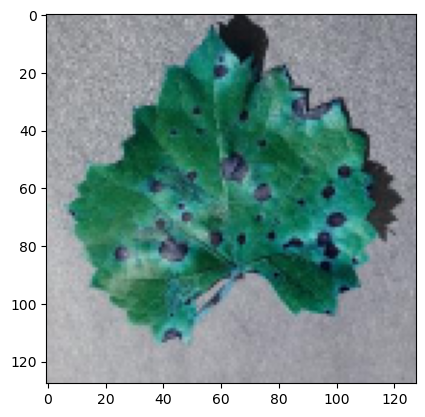

In [61]:
image = cv2.resize(image, (128, 128))
plt.imshow(image)
plt.show()

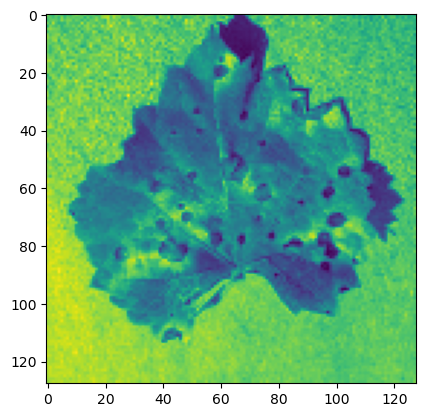

In [62]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()

In [63]:
x_test = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
x_test

array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
       0.2215013 ])

## PREDICTIVE SYSTEM (USING THE SAVED MODEL)

In [64]:
from joblib import load
loaded_randomforest_model = load("D:\\PLANT_DISEASE\\archive (7)\\RANDOMFOREST_PLANT_DISEASE.joblib")

In [65]:
y_test_pred = loaded_randomforest_model.predict(x_test.reshape(1, -1))

In [66]:
y_test_pred[0]

4

In [67]:
dict = {
    0	: "Apple-Black-rot",
1:	"Blueberry-healthy",
2:	"Cherry-Powdery-mildew",
3:	"Corn-(maize)-Common-rust",
4:	"Grape-Black-rot",
5:	"Orange-Haunglongbing-(Citrus_greening)",
6:	"Peach-Bacterial-spot",
7:	"Pepper-bell-Bacterial-spot",
8:	"Potato-Early-blight",
9:	"Raspberry-healthy",
10:	"Soybean-healthy",
11:	"Squash-Powdery-mildew",
12:	"Strawberry-Leaf-scorch",
13:	"Tomato-Early-blight",
14:	"Tomato-Tomato-Yellow-Leaf-Curl-Viru",
    
}

In [68]:
dict[y_test_pred[0]]

'Grape-Black-rot'

## VISUALISATION (USING DIMENSIOANALITY REDUCTIONALITY)

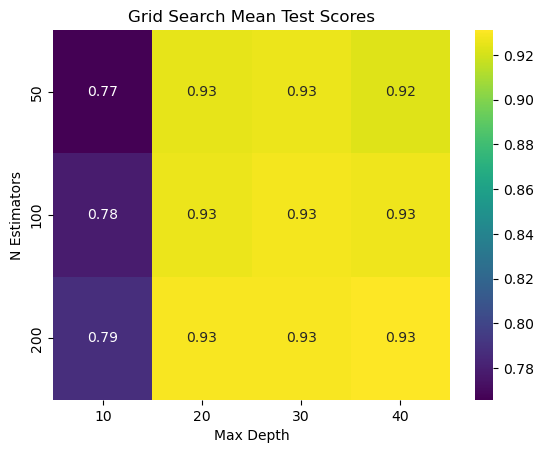

In [278]:
import seaborn as sns
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

heatmap_data = results.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.show()


## HYPER-PARAMETER RESULTS PLOT

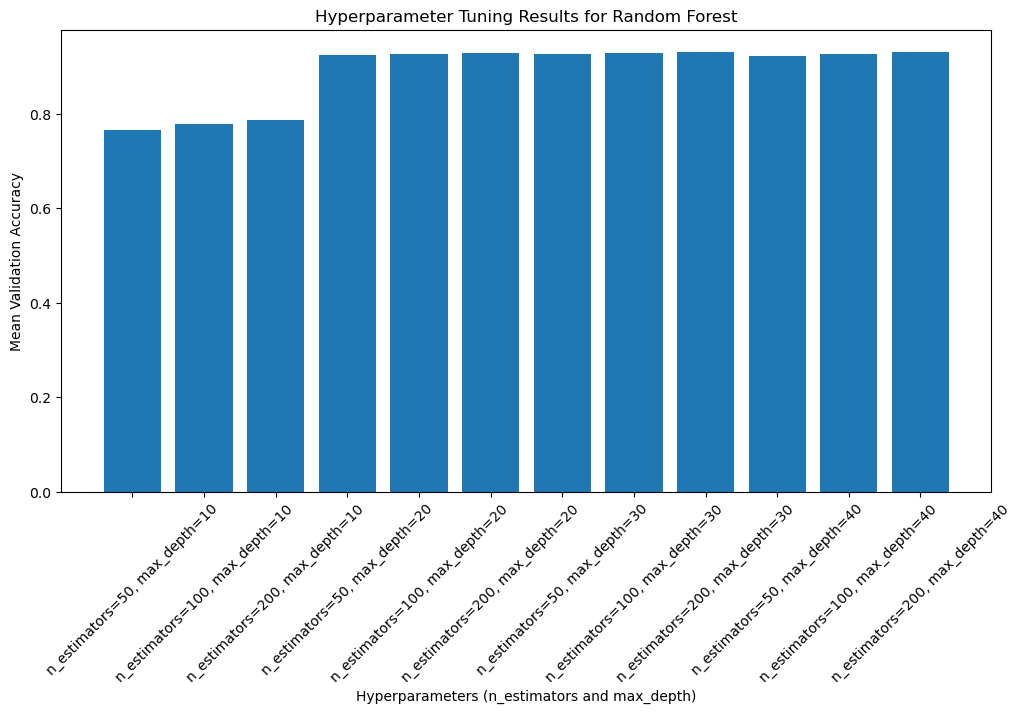

In [279]:
import matplotlib.pyplot as plt

results = grid_search.cv_results_
param_values = [f'n_estimators={params["n_estimators"]}, max_depth={params["max_depth"]}' for params in results['params']]
mean_scores = results['mean_test_score']

plt.figure(figsize=(12, 6))
plt.bar(param_values, mean_scores)
plt.xlabel('Hyperparameters (n_estimators and max_depth)')
plt.ylabel('Mean Validation Accuracy')
plt.title('Hyperparameter Tuning Results for Random Forest')
plt.xticks(rotation=45)
plt.show()

In [120]:
X.shape,y.shape

((7500, 8100), (7500,))

## PCA VARIANCE CURVE PLOT

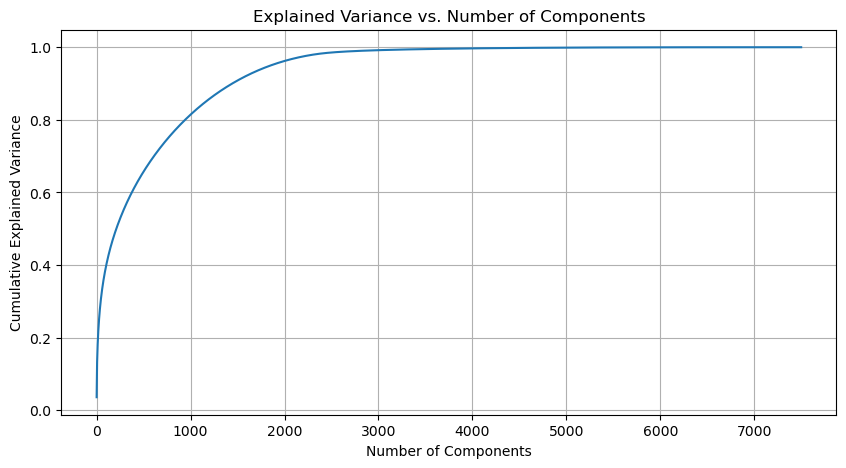

In [121]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [239]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4000)

x_pca = pca.fit_transform(X)


In [240]:
df = pd.DataFrame(x_pca)
df

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,-0.353252,-0.840564,-0.994494,0.593439,-0.196132,-0.118514,0.855202,-0.894554,-0.382983,-0.007882,...,0.003450,0.031446,0.003524,0.014869,-0.006943,-0.007444,-0.021714,0.013258,0.017518,0.027964
1,-0.355191,-1.243878,-0.178584,0.753212,-0.100948,0.360354,-0.335312,-0.399458,-0.417149,-0.010448,...,-0.005866,-0.001398,-0.007026,0.018835,-0.016822,-0.008642,-0.014170,0.007695,-0.003240,0.001212
2,-0.424512,-1.113491,-0.297861,0.680344,-0.176030,0.325187,0.309495,-0.526262,0.525315,0.542422,...,-0.011595,0.001476,0.008275,-0.022117,0.003552,-0.005750,-0.007489,-0.007303,-0.021191,-0.022765
3,2.171722,0.318889,-0.603505,4.362394,-0.173255,0.122178,0.583696,-0.252044,0.456435,-0.211913,...,-0.020935,-0.024645,0.008346,-0.009033,-0.007936,0.010090,-0.008600,0.005647,0.006703,-0.003800
4,-0.141556,-0.156856,-0.337249,-0.491358,0.315878,1.144522,0.383253,-0.282857,-2.107894,-0.050300,...,-0.000675,0.004547,-0.006510,-0.011851,0.016116,-0.007274,-0.002606,0.007016,-0.005181,0.013571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.024795,1.735009,2.549669,-0.769239,1.731102,-1.708029,1.893686,0.129349,-0.042068,0.891799,...,-0.008836,0.006736,-0.011255,-0.040465,-0.013236,0.010240,-0.001121,-0.023375,-0.016541,-0.010714
7496,-0.269296,-0.966391,1.949614,0.777088,-1.224380,-1.294816,-0.416970,-0.801767,0.004220,-0.478731,...,0.000603,0.012346,0.011209,0.034364,-0.011217,0.003797,0.008755,0.001249,0.013479,-0.005028
7497,-0.871903,0.322688,-1.376373,-0.335832,0.613099,-0.675550,0.072168,0.488077,-0.282086,-0.608641,...,-0.014005,0.012476,-0.004487,-0.006480,0.008764,0.004394,0.002967,0.000995,0.025346,-0.001908
7498,-0.686404,0.039189,-0.349691,-0.109039,-1.929338,0.361172,-1.067934,1.454776,0.611792,-0.528178,...,-0.005879,-0.001601,-0.000532,-0.010255,-0.002930,0.001228,-0.006551,-0.000646,0.000487,0.017891


In [241]:
feature_names = df.columns

In [242]:
feature_names

RangeIndex(start=0, stop=4000, step=1)

In [243]:
randomforest_model_pca = RandomForestClassifier(
    n_estimators=200,  
    criterion='gini',  
    max_depth=40, 
)

In [244]:
x_pca.shape,y_enc.shape

((7500, 4000), (7500,))

In [245]:
randomforest_model_pca.fit(x_pca, y_enc)

RandomForestClassifier(max_depth=40, n_estimators=200)

In [246]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_100"

In [247]:
feature_test=[]
label_test=[]

In [248]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [249]:
for class_label in os.listdir(data_valid_dir):
    class_dir = os.path.join(data_valid_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)

        image = cv2.resize(image, (128, 128))

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

        feature_vectors_valid.append(features)
        labels_valid.append(class_label)

In [250]:
feature_vectors_valid

[array([0.21328912, 0.        , 0.16700493, ..., 0.07994909, 0.22296044,
        0.14305417]),
 array([0.15237508, 0.07036889, 0.14665507, ..., 0.21957034, 0.12652922,
        0.13956495]),
 array([0.18057921, 0.00663334, 0.04575824, ..., 0.13672808, 0.13693613,
        0.10316129]),
 array([0.14837934, 0.06614929, 0.07827395, ..., 0.23985809, 0.09318912,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.21607873, 0.13672199, 0.04116568, ..., 0.15775564, 0.13203765,
        0.04620745]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.2919783 , 0.04812105, 0.07872579, ..., 0.0538613 , 0.17429683,
        0.06966076]),
 array([0.22895477, 0.14064216, 0.1700406 , ..., 0.16830015, 0.17651345,
        0.09511412]),
 array([0.23984255, 0.07865992, 0.12987424, ..., 0.13177663, 0.17392774,
        0.08521013]),
 array([0.15702468, 0.24735834, 0.0691484 , ..., 0.23629224, 0.22758263,
        0.12082506]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.23606311, 0.026144

In [251]:
labels_valid

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [252]:
X_valid = np.array(feature_vectors_valid)
y_valid = np.array(labels_valid)

In [253]:
label_encoder = LabelEncoder()
y_valid = label_encoder.fit_transform(y_valid)

In [254]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4000)

x_test = pca.fit_transform(X_valid)


In [255]:
y_test_pred = randomforest_model_pca.predict(x_test)

In [256]:
accuracy_valid = accuracy_score(y_valid, y_test_pred)

In [326]:
accuracy_valid

0.54233

In [273]:
df_orig = pd.DataFrame(X)

## TREE PLOT

[Text(0.29015261627906974, 0.9545454545454546, '5965 <= 0.004\ngini = 0.931\nsamples = 8668\nvalue = [992, 951, 1026, 998, 1044, 1014, 1009, 1019, 945\n995, 987, 1017, 674, 517, 491]'),
 Text(0.0833938953488372, 0.8636363636363636, '735 <= 0.005\ngini = 0.506\nsamples = 684\nvalue = [5, 149, 16, 742, 0, 2, 7, 0, 5, 151, 3, 5, 6\n8, 0]'),
 Text(0.032703488372093026, 0.7727272727272727, '7418 <= 0.018\ngini = 0.656\nsamples = 172\nvalue = [0, 100, 0, 69, 0, 0, 0, 0, 0, 107, 0, 0, 0\n0, 0]'),
 Text(0.014534883720930232, 0.6818181818181818, '4227 <= 0.082\ngini = 0.256\nsamples = 56\nvalue = [0, 70, 0, 2, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0\n0]'),
 Text(0.00872093023255814, 0.5909090909090909, '335 <= 0.035\ngini = 0.055\nsamples = 49\nvalue = [0, 69, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.005813953488372093, 0.5, '6069 <= 0.298\ngini = 0.028\nsamples = 48\nvalue = [0, 69, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.0029069767441860465, 0.4090909090909091, 'gini = 0.0\nsamples =

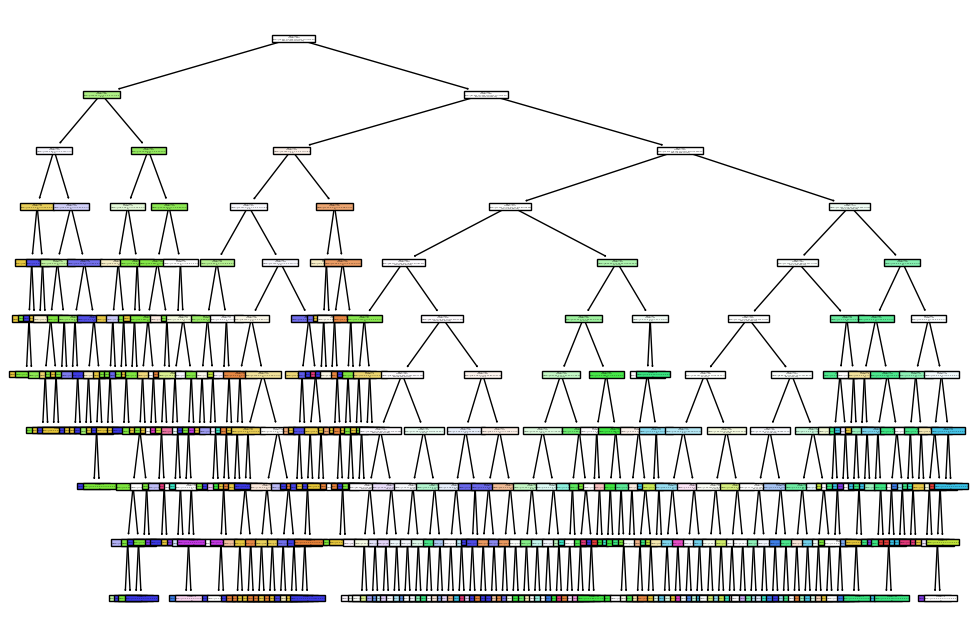

In [275]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=df_orig.columns)

## FEATURE IMPORTANCE PLOT

In [130]:
importances = randomforest_model_tuned.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([5960, 4342, 5945, ..., 5168,  937, 1669], dtype=int64)

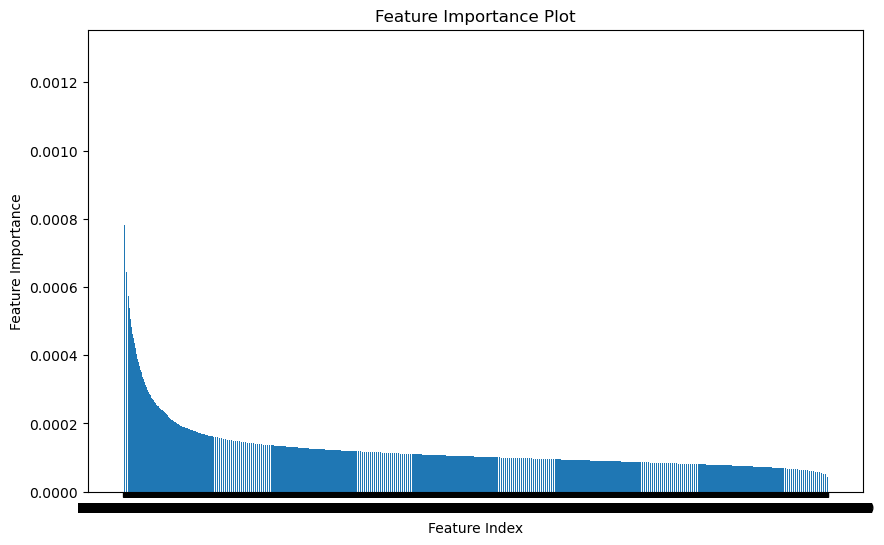

In [131]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [f"Feature {i}" for i in indices])
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()

## LEARNING CURVES

In [276]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    randomforest_model, X, y_enc, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

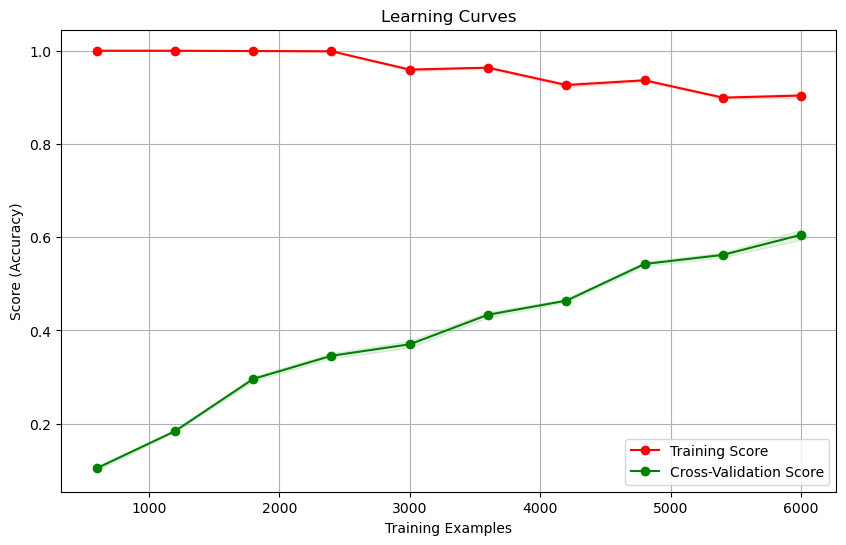

In [277]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

In [322]:
y_test.shape,y_test_pred.shape

((32,), (32,))

## ERROR CURVE - (MISCLASSIFICATION)

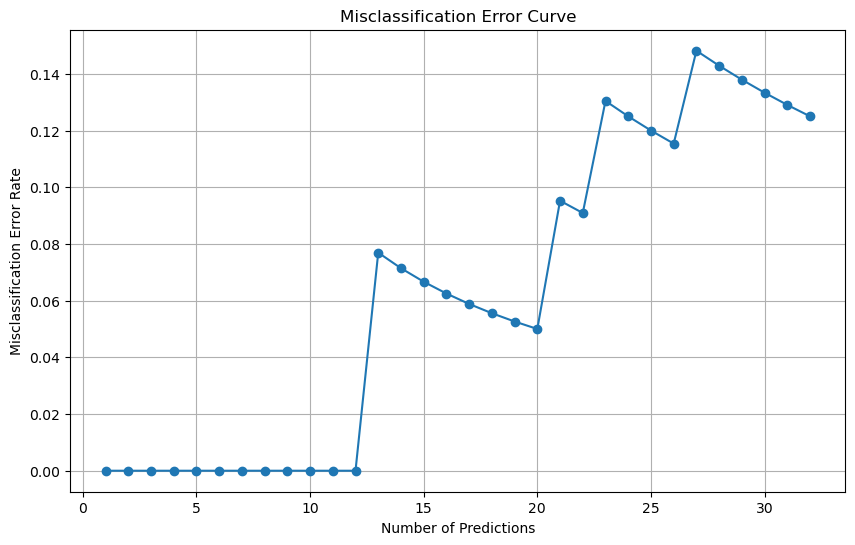

In [324]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error_rate_values = []

for i in range(1, len(y_test_pred) + 1):
    error_rate = 1 - accuracy_score(y_test[:i], y_test_pred[:i])
    error_rate_values.append(error_rate)

x_values = range(1, len(y_test_pred) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, error_rate_values, marker='o', linestyle='-')
plt.title('Misclassification Error Curve')
plt.xlabel('Number of Predictions')
plt.ylabel('Misclassification Error Rate')
plt.grid()
plt.show()
